In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import geopandas

In [2]:
rawData = pd.read_csv('Data/ConsumptionData')
populationData = pd.read_csv('Data/PopulationData')
rawData1 = rawData.where(rawData["year"] == 2019).dropna()

In [3]:
def sortDictionary(d,itemNum,rev=True):
    return {k: v for k, v in sorted(d.items(), key=lambda item: item[itemNum],reverse=rev)}

In [4]:
fuelTypes = ["biofuel", "coal", "fossil", "gas", "hydro", "low_carbon", "nuclear", "oil", "solar", "wind"]

renewable = ["hydro","solar","wind"]
nonrenewable =  ["biofuel", "coal", "fossil", "gas", "low_carbon", "nuclear", "oil"]


In [5]:
countryConsumption = {}
for r in list(rawData1["country"]):
    for x in fuelTypes:
        if r not in countryConsumption.keys():
            countryConsumption[r] = 0.0
        countryConsumption[r] += float(rawData1[rawData1["country"] == r][x])    
        
countryConsumptionSorted = sortDictionary(countryConsumption,1)

In [6]:
print("Top 20 countries by consumption:")
for k,v in list(countryConsumptionSorted.items())[:20]:
    print("%-15s" %k,"%s tWh" %round(v,1))

Top 20 countries by consumption:
China           78467.2 tWh
United States   52388.7 tWh
India           18859.2 tWh
Russia          16557.1 tWh
Japan           10271.2 tWh
CIS             9599.0 tWh
Canada          7869.9 tWh
Germany         7174.6 tWh
Iran            6857.7 tWh
South Korea     6837.2 tWh
Brazil          6751.5 tWh
Saudi Arabia    6130.9 tWh
France          5355.8 tWh
Indonesia       4911.8 tWh
Mexico          4270.1 tWh
United Kingdom  4265.1 tWh
Turkey          3570.6 tWh
Australia       3552.0 tWh
Italy           3483.3 tWh
Spain           3163.0 tWh


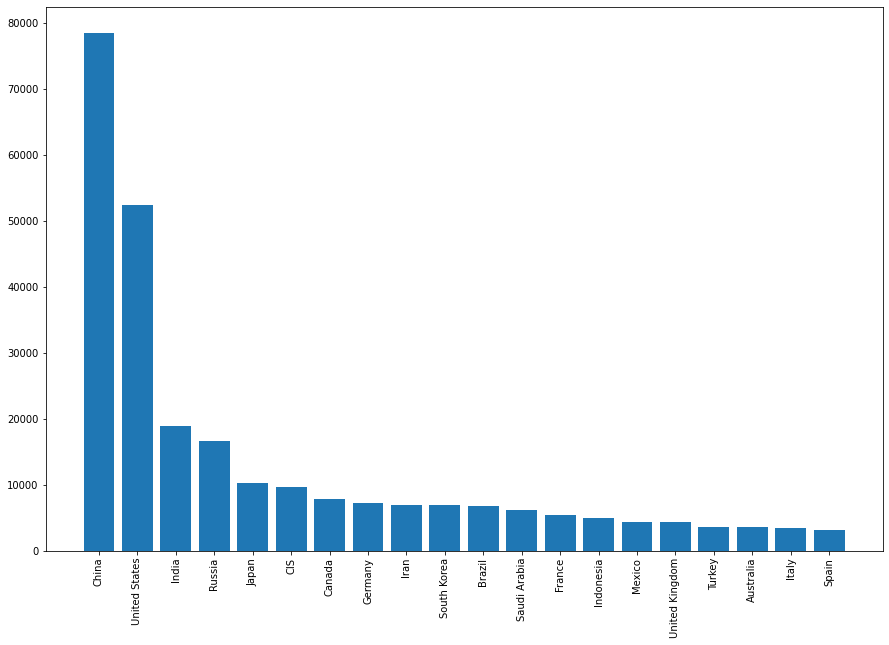

In [7]:
plt.figure(figsize=(15,10))
plt.bar(list(countryConsumptionSorted.keys())[:20], list(countryConsumptionSorted.values())[:20])
plt.xticks(rotation=90)
plt.show();

In [8]:
renewableC = {}
nonrenewableC = {}
for r in countryConsumptionSorted:
    for x in renewable:
        if r not in renewableC.keys():
            renewableC[r] = 0.0
        renewableC[r] += float(rawData1[rawData1["country"] == r][x])  
    for x in nonrenewable:
        if r not in nonrenewableC.keys():
            nonrenewableC[r] = 0.0
        nonrenewableC[r] += float(rawData1[rawData1["country"] == r][x])

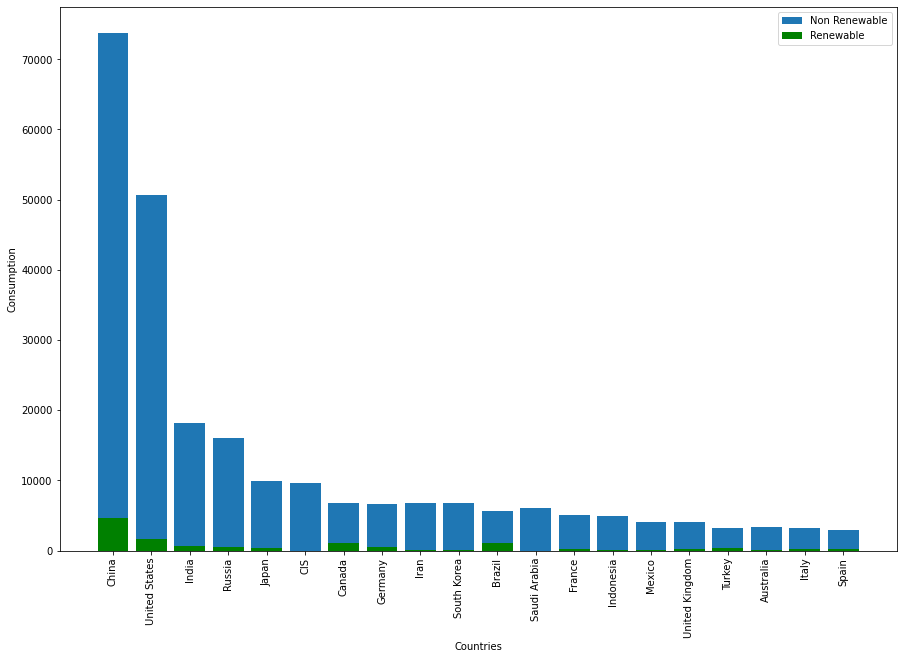

In [9]:
x = list(renewableC.keys())[:20]
non = list(nonrenewableC.values())[:20]
re = list(renewableC.values())[:20]

plt.figure(figsize=(15,10))
ax = plt.subplot(111)
ax.bar(x, non, label="Non Renewable")
ax.bar(x, re, color='g', label="Renewable")
ax.set_xlabel('Countries')
ax.set_ylabel('Consumption')
plt.xticks(rotation=90)
plt.legend()

plt.show();

In [10]:
population2019 = populationData.where(populationData["year"] == 2019).dropna()

In [11]:
countryPopulation = {}
for r in list(population2019["country"]):
    if r not in countryPopulation.keys():
        countryPopulation[r] = 0
    countryPopulation[r] = int(population2019[population2019["country"] == r]["population"])

In [12]:
correlation = np.corrcoef(list(countryConsumption.values()), list(countryPopulation.values()))
print("Correlation:\n")
print("%12s" %" ","%12s" %"Consumption", "%12s" %"Population")
print("%-12s" %"Consumption","%12f"%correlation[0][0],"%12f"%correlation[0][1])
print("%-12s" %"Population","%12f"%correlation[1][0],"%12f"%correlation[1][1])

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 217 and the array at index 1 has size 214

In [ ]:
countryPopulationSorted = sortDictionary(countryPopulation,1)

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(list(countryConsumptionSorted.values()),list(countryPopulationSorted.values()),color="b", linewidth=2)
plt.xlabel("Consumption")
plt.ylabel("Population")
plt.ticklabel_format(style='plain')
plt.show();

In [ ]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world = world[(world.name!="Antarctica")]
world['name'].mask(world['name'] == 'W. Sahara', 'Western Sahara', inplace=True)
world['name'].mask(world['name'] == 'United States of America', 'United States', inplace=True)
world['name'].mask(world['name'] == 'Macedonia', 'North Macedonia', inplace=True)
world['name'].mask(world['name'] == 'Bosnia and Herz.', 'Bosnia and Herzegovina', inplace=True)
world['name'].mask(world['name'] == 'S. Sudan', 'South Sudan', inplace=True)
world['name'].mask(world['name'] == 'Dem. Rep. Congo', 'Democratic Republic of Congo', inplace=True)
world['name'].mask(world['name'] == 'Central African Rep.', 'Central African Republic', inplace=True)
world['name'].mask(world['name'] == 'Eq. Guinea', 'Equatorial Guinea', inplace=True)
world['name'].mask(world['name'] == 'Solomon Is.', 'Solomon Islands', inplace=True)
world['name'].mask(world['name'] == 'Dominican Rep.', 'Dominican Republic', inplace=True)

In [ ]:
def drawMap(d,text):
    mapData = pd.DataFrame.from_dict({"country":d.keys(),"usage":d.values()})
    mapTable = world.merge(mapData, how="left", left_on=['name'], right_on=['country'])

    fig, ax = plt.subplots(figsize=(17,10))
    mapTable.plot(ax=ax,column='usage',
              edgecolor="black", linewidth=0.7,
              cmap='turbo',
              legend=True,
              legend_kwds={'label': text, 'orientation': "horizontal"},
              missing_kwds={"color": "lightgrey", "label": "Missing values", "hatch": "///"});

In [ ]:
drawMap(countryConsumptionSorted,"Usage per Country")

In [ ]:
# import folium
# my_map = folium.Map()
# folium.Choropleth(
#     geo_data=mapTable,
#     name='choropleth',
#     data=mapTable,
#     columns=['country', 'usage'],
#     key_on='feature.properties.name',
#     fill_color='OrRd',
#     fill_opacity=0.7,
#     line_opacity=0.2,
#     legend_name='usage'
# ).add_to(my_map);
# my_map

In [ ]:
renewableCSorted = sortDictionary(renewableC,1)
print("Top 20 countries by consumption of Renewable energy:")
for k,v in list(renewableCSorted.items())[:20]:
    print("%-15s" %k,"%s tWh" %round(v,1))

In [ ]:
drawMap(renewableCSorted,"Renewable energy Consumption")

In [ ]:
cc={}
for c,con in countryConsumptionSorted.items():
    cc[c] = 0.0
    for c1,pop in countryPopulationSorted.items():
        if c==c1:
            if pop!=0:
                cc[c] = round((con*1000000000)/pop,1)
            break
cc = sortDictionary(cc,1)
for k,v in list(cc.items()):
    print("%-35s" %k,"%s kWh" %round(v,3))

In [ ]:
asd = {k:v for k,v in cc.items() if v!=0}
plt.figure(figsize=(15,10))
plt.bar(list(asd.keys()), list(asd.values()))
plt.xticks(rotation=90)
plt.show();

In [ ]:
plt.figure(figsize=(15,10))
plt.bar(list(asd.keys())[:20], list(asd.values())[:20])
plt.xticks(rotation=90)
plt.show();

In [ ]:
drawMap(cc,"Consumption of energy per population (kWh)")